Training completed!
Accuracy: 1.0
ROC AUC: 1.0


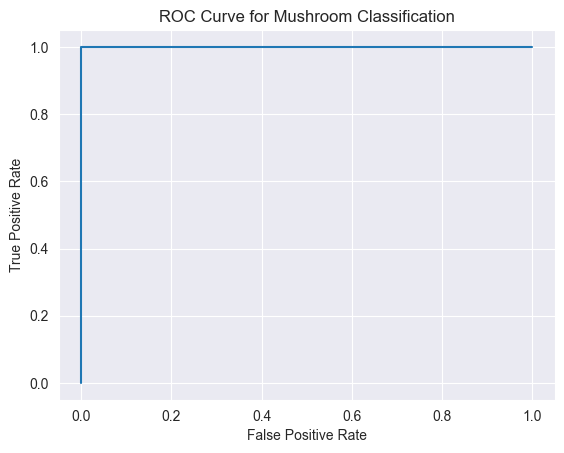

In [3]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

def preprocess_agaricus():
  df = pd.read_csv('agaricus-lepiota.csv')
  label_encoder = LabelEncoder()
  for col in df.columns[:-1]: 
    df[col] = label_encoder.fit_transform(df[col])
  target = df['poisonous']

  # Scale remaining features (excluding poisonous)
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(df.iloc[:, :-1])  # Exclude last column

  normalized_data = pd.DataFrame(scaled_data, columns=df.columns[:-1])
  selected_features = normalized_data

  return selected_features.to_numpy(), target.to_numpy().reshape(-1, 1)

incoming_params, target_array = preprocess_agaricus()
X_train, X_test, y_train, y_test = train_test_split(incoming_params, target_array, test_size=0.2, random_state=42)
    
def train_mush():
    mlp = MLPClassifier(hidden_layer_sizes=[3, 4, 5], activation='relu', solver='adam', max_iter=1000)
    mlp.fit(X_train, y_train.ravel())
    print("Training completed!")
    joblib.dump(mlp, "weights_mushrooms.joblib")
    
def test_mush():
    mlp = joblib.load("weights_mushrooms.joblib")
    predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    print("ROC AUC:", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC=%0.4f)' % roc_auc)
    plt.title('ROC Curve for Mushroom Classification')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()
    
incoming_params, target_array = preprocess_agaricus()
train_mush()
test_mush()
